In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
file = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
file.shape

(50000, 14)

In [5]:
file.isnull().sum().sum()

0

In [6]:
def ori(data):
    l = len(data)
    data = data[:l//2]
    return data

def dest(data):
    l = len(data)
    data = data[l//2:]
    return data

In [7]:
file['origin'] = file['route'].apply(ori)
file['destination'] = file['route'].apply(dest)
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [8]:
for col in file.select_dtypes('object'):
    file[col],_ = file[col].factorize()
file.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination
0,2,0,0,262,19,7,0,0,0,1,0,0,5.52,0,0,0
1,1,0,0,112,20,3,0,0,0,0,0,0,5.52,0,0,0
2,2,0,0,243,22,17,1,0,1,1,1,0,5.52,0,0,0
3,1,0,0,96,31,4,0,0,0,0,0,1,5.52,0,0,0
4,2,0,0,68,22,15,1,0,1,1,0,1,5.52,0,0,0


## Feature Selection

In [9]:
from sklearn.feature_selection import mutual_info_classif
x= file[['route','origin','destination']]
y = file['booking_complete']
score = mutual_info_classif(x,y)
info = pd.Series(score)
info.index = x.columns
info.sort_values(ascending= False)

destination    0.005320
origin         0.004955
route          0.001415
dtype: float64

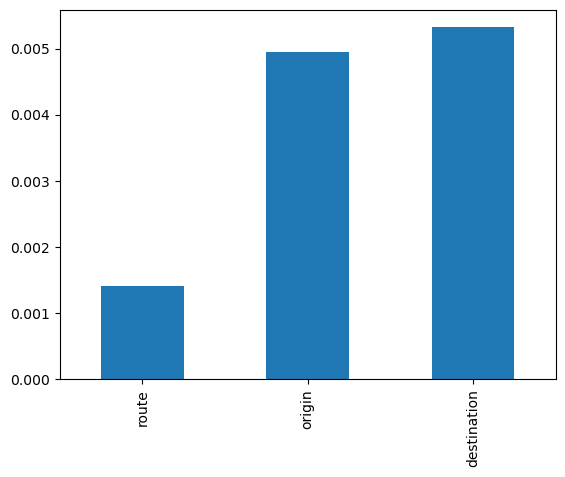

In [11]:
info.sort_values(ascending=True).plot.bar()
plt.savefig('C:/Users/risha/OneDrive/Desktop/Forage British Airways Data science/Task 2/Results/features.png', bbox_inches = 'tight')